In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# load data
oecd_bli = pd.read_csv("../datasets/lifesat/oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv("../datasets/lifesat/gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [3]:
# prepare data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

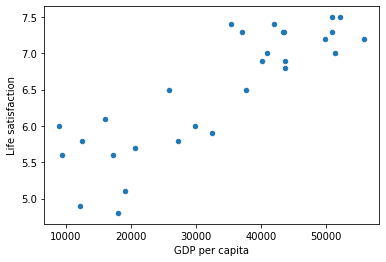

In [5]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [6]:
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


In [8]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

In [9]:
# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[4.85305280e+00]
 [4.91154459e-05]]


In [10]:
w_0 = w[0][0]
w_1 = w[1][0]
x0 = X
y0 = w_0 + w_1*x0
print(w_0 + w_1*X_new[0][0])

5.962423376756406


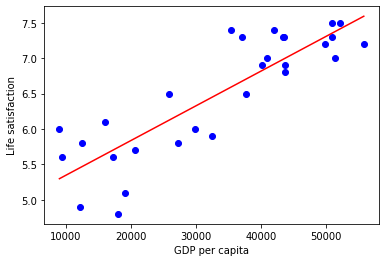

In [11]:
# Drawing the fitting line 
plt.subplot(1,1,1)
plt.plot(X, y, 'bo')     # data 
plt.plot(x0, y0, 'r')               # the fitting line
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.show()